<a href="https://colab.research.google.com/github/baraa-hakawati/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1: Prediction of Product Sales
- Author: Baraa A. Hakawati

# Project 1 - Parts 1 & 2
## Project Overview


## Load and Inspect Data

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the dataset
path = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df = pd.read_csv(path)
# General info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [3]:
# Display first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

In [4]:
# Display the number of rows and columns within the dataset
print(f"The number of records within the dataset (rows) is : {df.shape[0]}")
print(f"The mumber of features within the dataset (columns) is: {df.shape[1]}")

The number of records within the dataset (rows) is : 8523
The mumber of features within the dataset (columns) is: 12


In [5]:
print("\nThe datatypes of each feature in the data set (variable or columns) is:")
df.dtypes


The datatypes of each feature in the data set (variable or columns) is:


,0
Item_Identifier,object
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object


In [6]:
# Check whether duplicates are included within the data
print(f"\nThere are {df.duplicated().sum()} duplicated records within the data")
# Droping duplicates if any exist
df = df.drop_duplicates()


There are 0 duplicated records within the data


In [7]:
# Identify missing values
print("\nMissing values in each feature are:")
df.isnull().sum()


Missing values in each feature are:


,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [8]:
# Address missing values by using a placeholder value
# Starting with fill missing values in categorical columns with "MISSING"
cat_col = df.select_dtypes(include=['object']).columns
for col in cat_col:
    df[col] = df[col].fillna('MISSING')
#Movinf to fill missing values in numeric columns with -1
num_col = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_col:
    df[col] = df[col].fillna(-1)

In [9]:
# Confirm that there are no missing values after addressing
print("\nMissing values after cleaning drown as:")
print(df.isnull().sum())


Missing values after cleaning drown as:
Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [10]:
#Fix inconsistent categories of data
cat_list = cat_col.tolist()
for col in cat_list:
  print(f'\nThe values counting included in {col} are:')
  print( df.value_counts(col))


The values counting included in Item_Identifier are:
Item_Identifier
FDW13    10
FDG33    10
FDU12     9
DRE49     9
NCB18     9
         ..
FDN52     1
FDQ60     1
FDT35     1
FDY43     1
FDC23     1
Name: count, Length: 1559, dtype: int64

The values counting included in Item_Fat_Content are:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

The values counting included in Item_Type are:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

The values coun

In [11]:
# We have to fix inconsistent categories in the feature of Item_Fat_Content
cons_itm_fat = {'LF': 'Low Fat','low fat': 'Low Fat', 'reg': 'Regular'}
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(cons_itm_fat)
#In order to verify the changes
print("Value counts for Item_Fat_Content after handiling the drtected inconsistencies:")
df['Item_Fat_Content'].value_counts()

Value counts for Item_Fat_Content after handiling the drtected inconsistencies:


,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


# Project 1 - Part 3
## Exploratory Data Analysis

In [12]:
# Define the numerical columns in the dataset
num_col = df.select_dtypes(include=['float64','int64']).columns
df[num_col]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


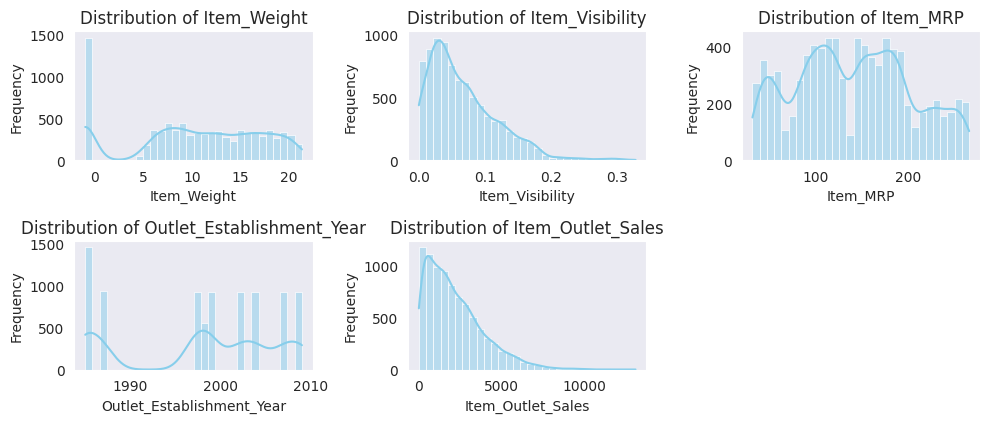

In [13]:
sns.set_style("dark")
# Define the subplot grid size
num_fea = len(num_col)
# In order to ensure  that we have enough rows
num_rows = (num_fea // 2) + (num_fea % 2)
# Initialize the overall plot
plt.figure(figsize=(10, 2 * num_rows))
# Loop through numerical columns
for i, feature in enumerate(num_col, 1):
    plt.subplot(num_rows, 3, i)  # Adjust rows dynamically
    # Histograms for numerical features
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
# Save histograms
plt.savefig("/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week03/histograms.png")
plt.show()

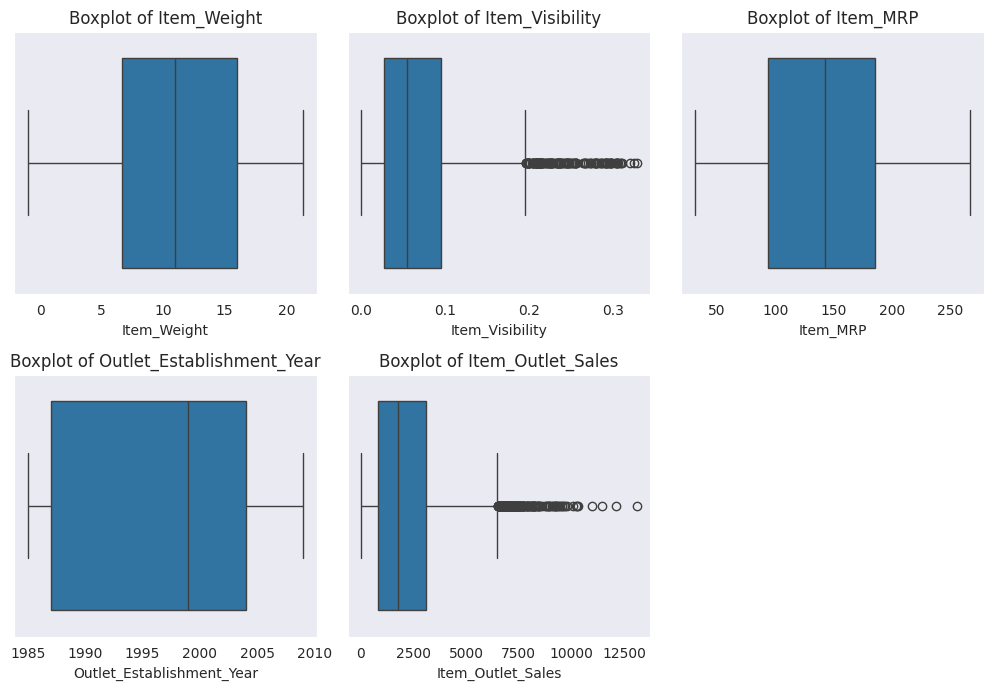

In [14]:
# Boxplots for numerical features
plt.figure(figsize=(10, 2 * num_fea))
for i, feature in enumerate(num_col, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week03/Boxplots.png")
plt.show()

In [15]:
df[cat_col]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,MISSING,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,MISSING,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


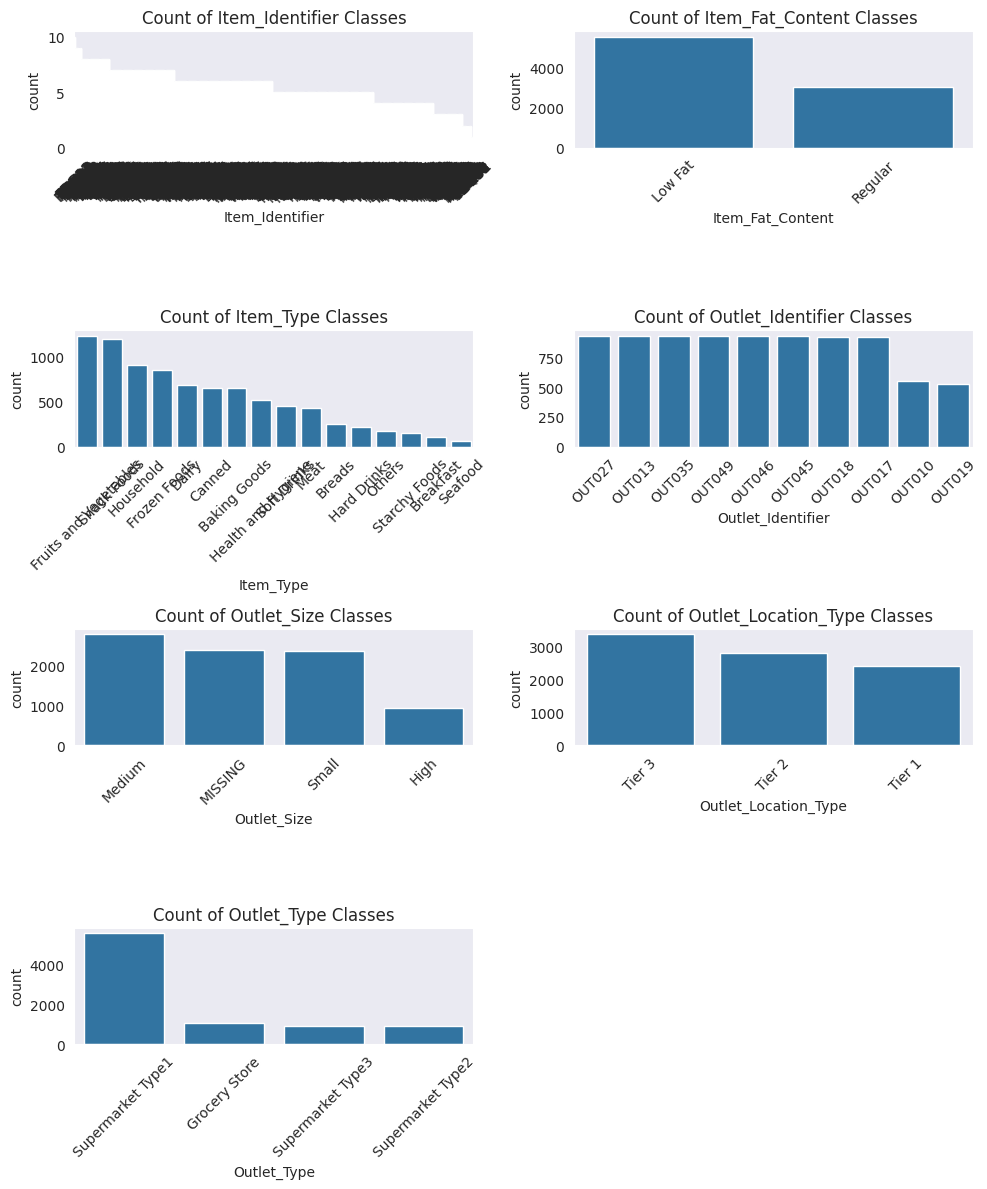

In [16]:
num_cat_fea = len(cat_col)
cat_rows = (num_cat_fea // 2) + (num_cat_fea % 2)
# Countplots for categorical features
plt.figure(figsize=(10,3 * cat_rows))
for i, feature in enumerate(cat_col, 1):
    plt.subplot(cat_rows, 2, i)
    sns.countplot(x=df[feature], order=df[feature].value_counts().index)
    plt.title(f'Count of {feature} Classes')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week03/Countplots.png")
plt.show()

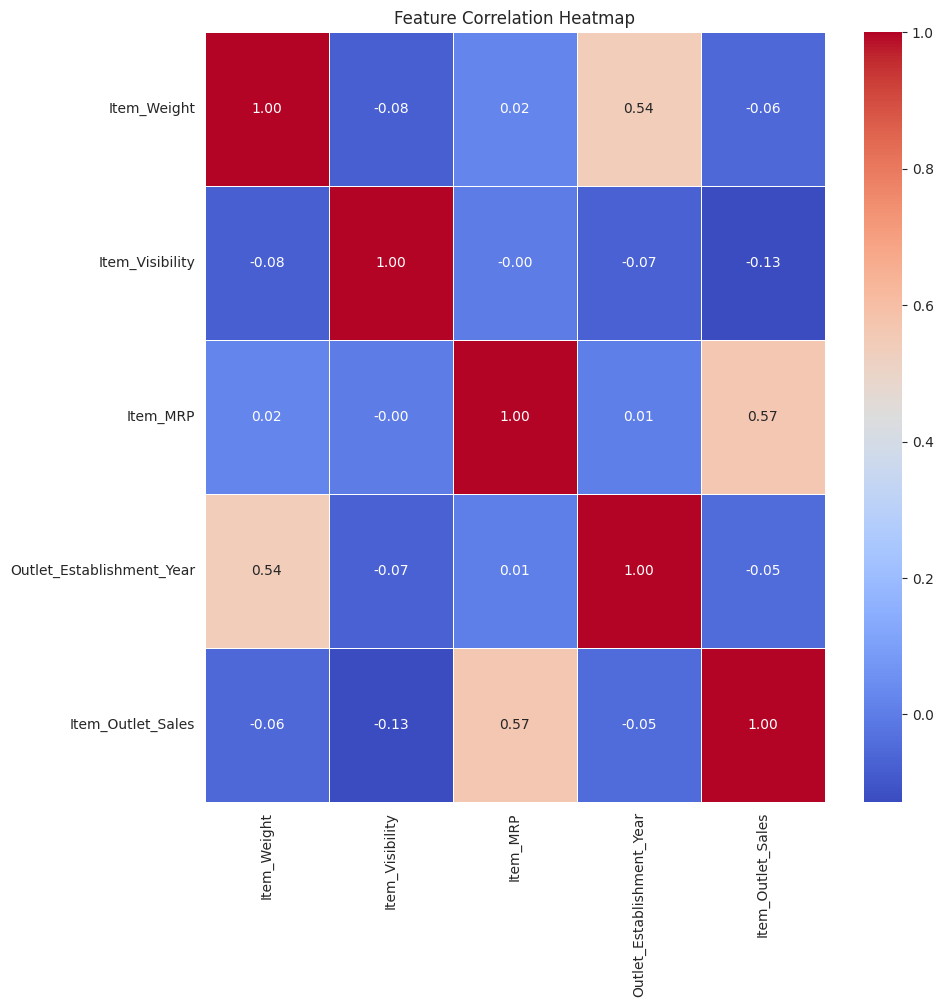

In [17]:
# Heatmap for correlations
plt.figure(figsize=(10, 2 * num_fea))
corr = df[num_col].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.savefig("/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week03/Heatmap.png")
plt.show()

# Project 1 - Part 4
## Explanatory Visuals & Analysis - Feature Inspection

In [18]:
# Restoreing the original null values where included in the dataset by removing the placeholders we've been inserted
df.replace({"MISSING": np.nan, -1: np.nan}, inplace=True)
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [19]:
# Histogram with KDE for a numerical feature.
def num_featur(df, feature, color='purple', figsize=(10, 5)):
    plt.figure(figsize=figsize)
    sns.histplot(df[feature].dropna(), kde=True, color=color)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [20]:
 # Count plot for a categorical feature
def cat_feature(df, feature, color='red', figsize=(8, 4)):
    plt.figure(figsize=figsize)
    sns.countplot(x=df[feature], order=df[feature].value_counts().index, color=color)
    plt.title(f'Count of {feature} Classes')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [21]:
# Function for categorical features vs the target creation
def cat_vs_target(df, x, y='Item_Outlet_Sales', figsize=(8, 6), order=None):
    plt.figure(figsize=figsize)
    # Bar plot (mean target value)
    sns.barplot(data=df, x=x, y=y, ax=plt.gca(), hue=x, order=order, alpha=0.6,
                linewidth=1, edgecolor='black', errorbar=None)
    # Strip plot (distribution of target values)
    sns.stripplot(data=df, x=x, y=y, hue=x, ax=plt.gca(),
                  order=order, hue_order=order, legend=False,
                  edgecolor='white', linewidth=0.5, size=3, zorder=0)
    # Rotate x-labels for better readability
    plt.xticks(rotation=45, ha='right')
    # Add a title
    plt.title(f"{x} vs. {y}")
    plt.tight_layout()
    plt.show()

In [22]:
# Npw, we have to creat a function for numerical features vs the target
def num_vs_target(df, x, y='Item_Outlet_Sales', figsize=(8, 6)):
    corr = df[[x,y]].corr().round(2)
    r = corr.loc[x,y]
    plt.figure(figsize=figsize)
    sns.scatterplot(data=df, x=x, y=y, alpha=0.6, color='red')
    sns.regplot(data=df, x=x, y=y, scatter=False, color='black')
    plt.title(f"{x} vs. {y} (Correlation = {r})")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

### Feature: Item_Identifier
**Definition**: Product ID.

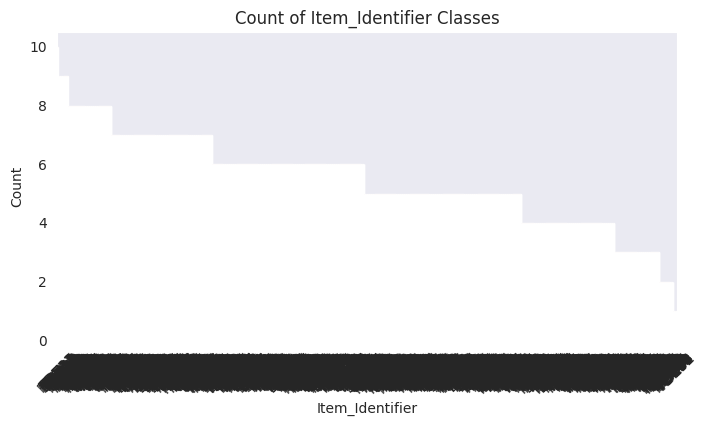

In [23]:
# Univariate visualization (categorical feature)
cat_feature(df, 'Item_Identifier')

- **Feature Inspection Questions:**
1. **Type of Feature**: Categorical (nominal),.
2. **Null Values**: 0 null values.
3. **Constant or Quasi-Constant**: Not constant
4. **Cardinality**: High (1559 unique values).
5. **Known Before Target**: Yes.
6. **Business Case for Exclusion**: Likely to exclude, as it is a unique identifier and not useful for prediction.

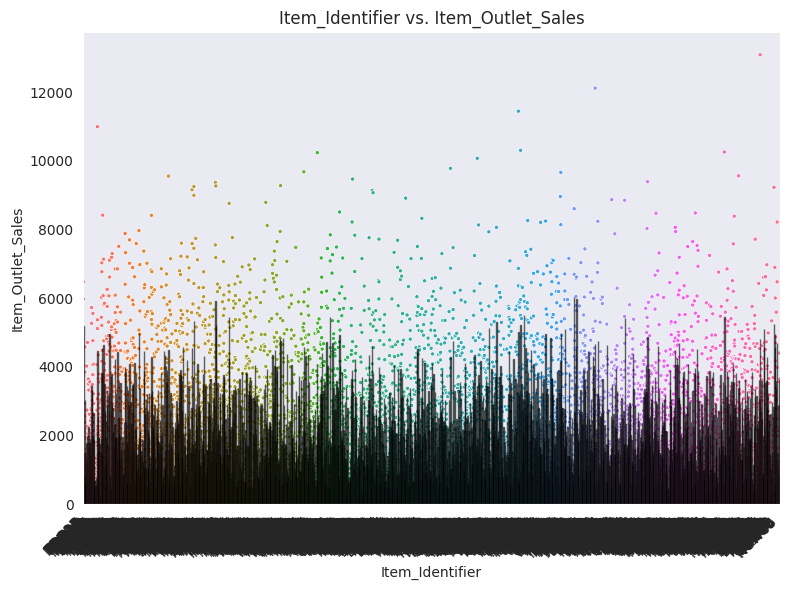

In [24]:
# Multivariate visualization (vs. Item_Outlet_Sales)
cat_vs_target(df, x='Item_Identifier')

- **Multivariate Analysis Questions:**
1. **Expected Predictor:** No, it is a unique identifier.
2. **Appears to be a Predictor:** No.

### Feature: Item_Weight
**Definition**: Weight of the product.

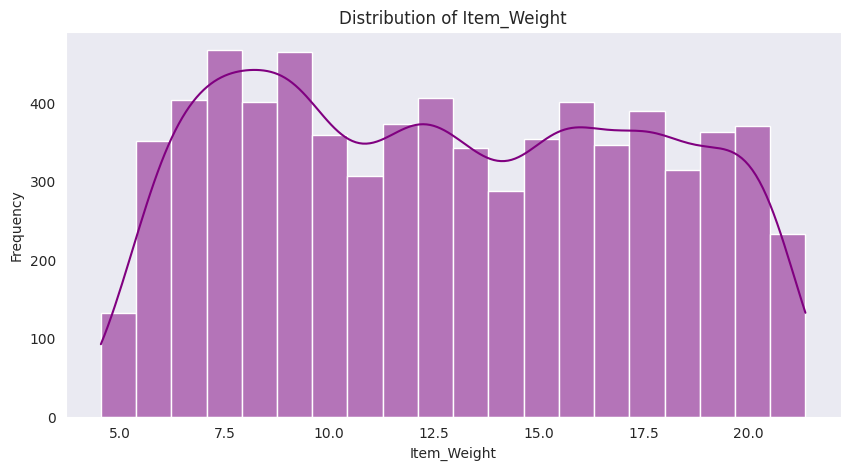

In [25]:
# Univariate visualization (numerical feature)
num_featur(df, 'Item_Weight')

- **Feature Inspection Questions:**
1. **Type of Feature**: Numeric (continuous).
2. **Null Values**:
   - Number of null values: 1463
   - Percentage of null values: 17.2% (1463 / 8523)
   - Action: We droped the null values
3. **Constant or Quasi-Constant**: No, the feature is not constant or quasi-constant.
4. **Cardinality**: High (unique values > 10).
5. **Known Before Target**: Yes, the weight of an item is known before sales.
6. **Business Case for Exclusion**: No, item weight could influence sales (e.g., heavier items might cost more or be bulkier).

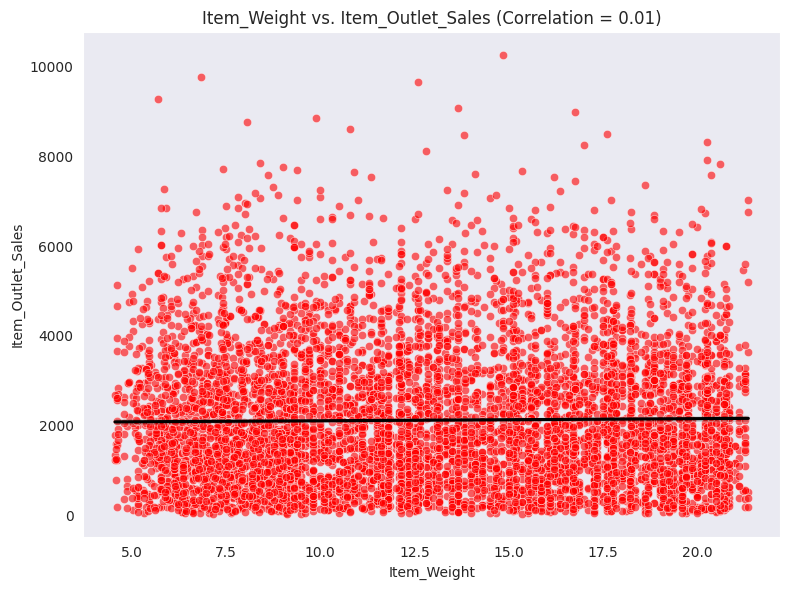

In [26]:
# Multivariate visualization (vs. Item_Outlet_Sales)
num_vs_target(df, x='Item_Weight')

- **Multivariate Analysis Questions:**
1. **Expected Predictor:** Yes, heavier items might have higher sales.
2. **Appears to be a Predictor:** No clear linear relationship.

### Feature: Item_Fat_Content
**Definition**: Whether the product is low-fat or regular.

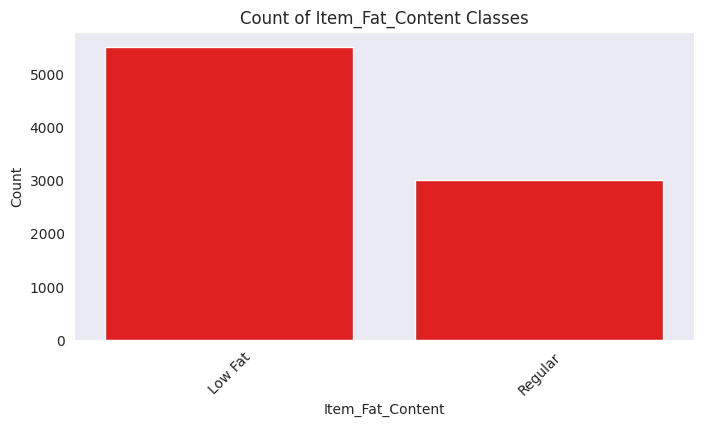

In [27]:
# Univariate visualization (categorical feature)
cat_feature(df, 'Item_Fat_Content')

- **Feature Inspection Questions:**

1. **Type of Feature:** Categorical (nominal).
2. **Null Values:** 0 null values.
3. **Constant or Quasi-Constant:** No.
4. **Cardinality:** Low (2 unique values after fixing inconsistencies).
5. **Known Before Target:** Yes.
6. **Business Case for Exclusion:** No, fat content could influence sales.

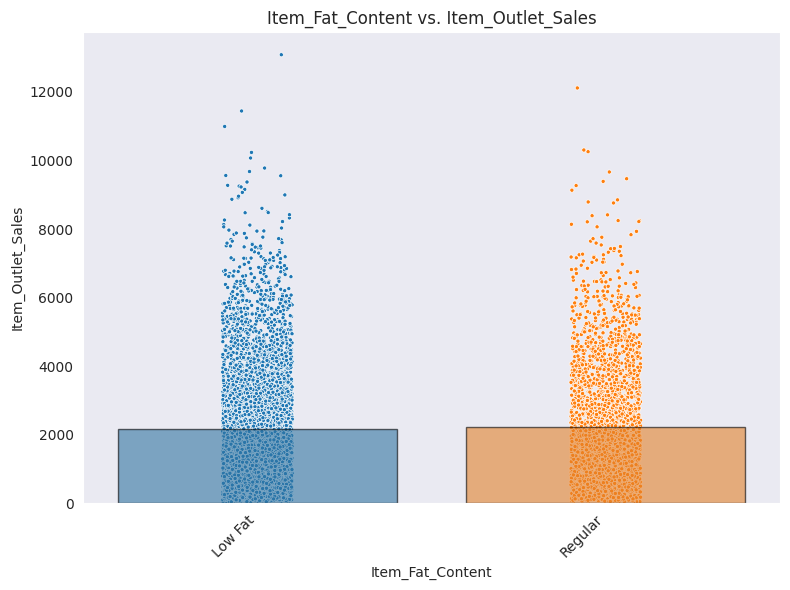

In [28]:
# Multivariate visualization (vs. Item_Outlet_Sales)
cat_vs_target(df, x='Item_Fat_Content')

- **Multivariate Analysis Questions:**
1. **Expected Predictor:** Yes, there are products might sell differently.
2. **Appears to be a Predictor:** No, there is no noticeable difference in sales.

### Feature: Item_Visibility
**Definition**: The percentage of total display area allocated to the product.

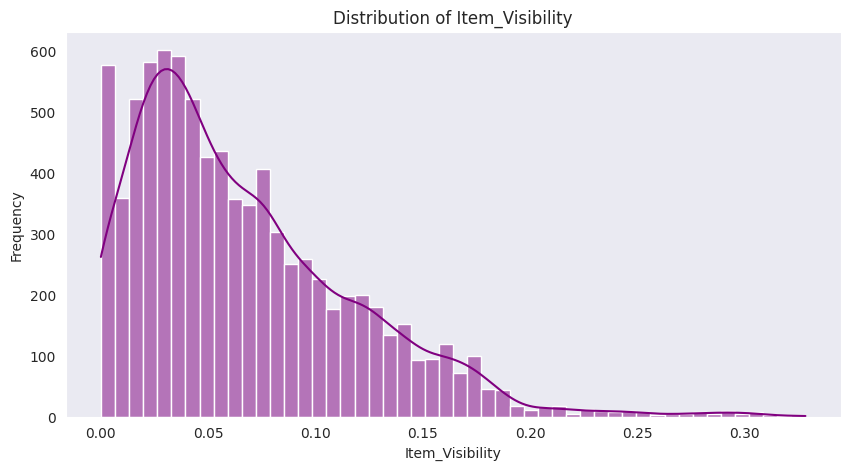

In [29]:
# Univariate visualization (numerical feature)
num_featur(df, 'Item_Visibility')

- **Feature Inspection Questions:**
1. **Type of Feature:** Numeric (continuous).
2. **Null Values:** 0 null values.
3. **Constant or Quasi-Constant:** No.
4. **Cardinality:** High (unique values > 10).
5. **Known Before Target:** Yes.
6. **Business Case for Exclusion:** No, visibility could influence sales.

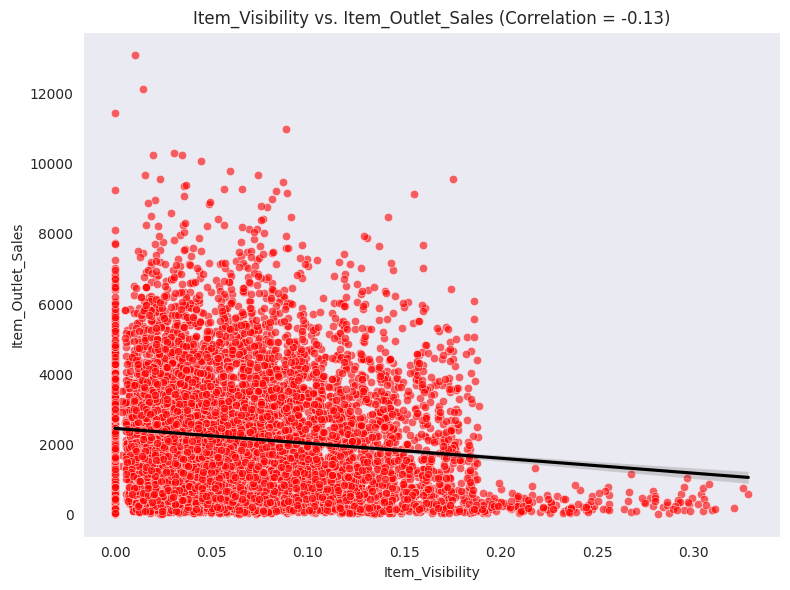

In [30]:
# Multivariate visualization (vs. Item_Outlet_Sales)
num_vs_target(df, x='Item_Visibility')

- **Multivariate Analysis Questions:**
1. **Expected Predictor:** Yes, higher visibility might lead to higher sales.
2. **Appears to be a Predictor:** Yes, there is a slight negative trend.

### Feature: Item_Type
**Definition**: The category to which the product belongs.

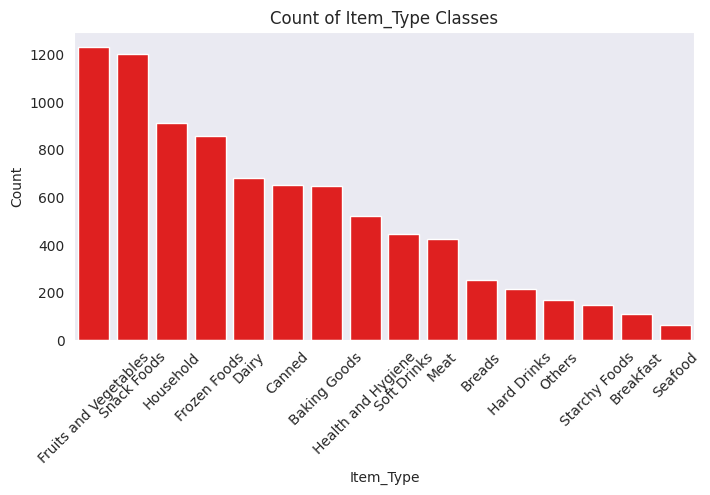

In [31]:
# Univariate visualization (categorical feature)
cat_feature(df, 'Item_Type')

- **Feature Inspection Questions:**
1. **Type of Feature:** Categorical (nominal).
2. **Null Values:** 0 null values.
3. **Constant or Quasi-Constant:** No.
4. **Cardinality:** High (16 unique values).
5. **Known Before Target:** Yes.
3. **Business Case for Exclusion:** No, product type could influence sales.

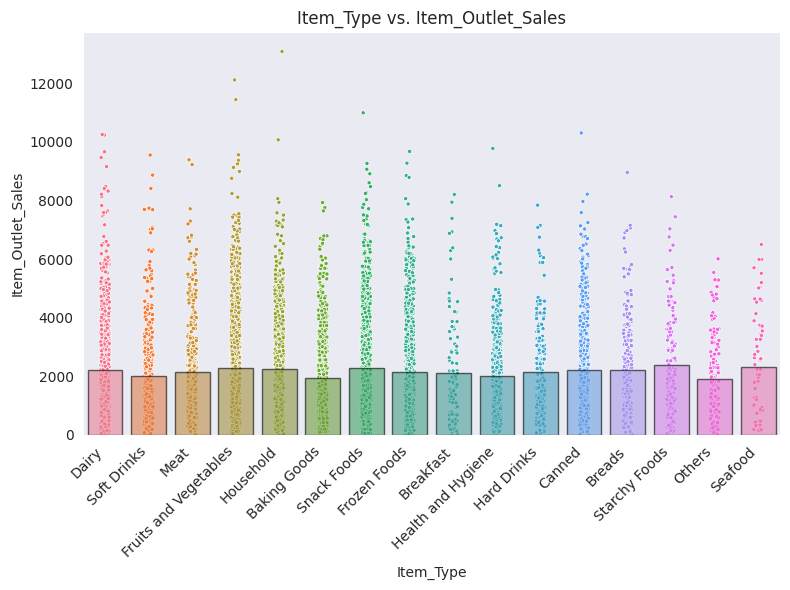

In [32]:
# Multivariate visualization (vs. Item_Outlet_Sales)
cat_vs_target(df, x='Item_Type')

- **Multivariate Analysis Questions:**
1. **Expected Predictor:** Yes, certain product types might sell better.
2. **Appears to be a Predictor:** Yes, there are noticeable differences in sales.

### Feature: Item_MRP
**Definition**: Maximum Retail Price (list price) of the product.

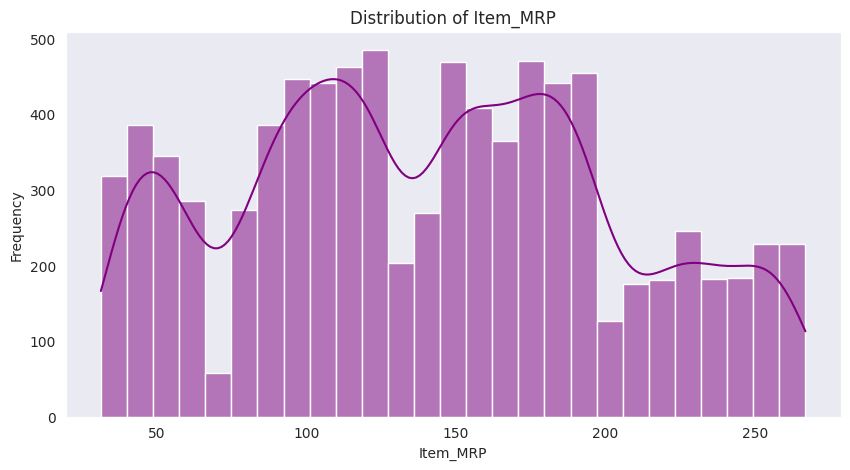

In [33]:
# Univariate visualization (numerical feature)
num_featur(df, 'Item_MRP')

- **Feature Inspection Questions:**
1. **Type of Feature:** Numeric (continuous).
2. **Null Values:** 0 null values.
3. **Constant or Quasi-Constant:** No.
4. **Cardinality:** High (unique values > 10).
5. **Known Before Target:** Yes.
6. **Business Case for Exclusion:** No, price could influence sales.

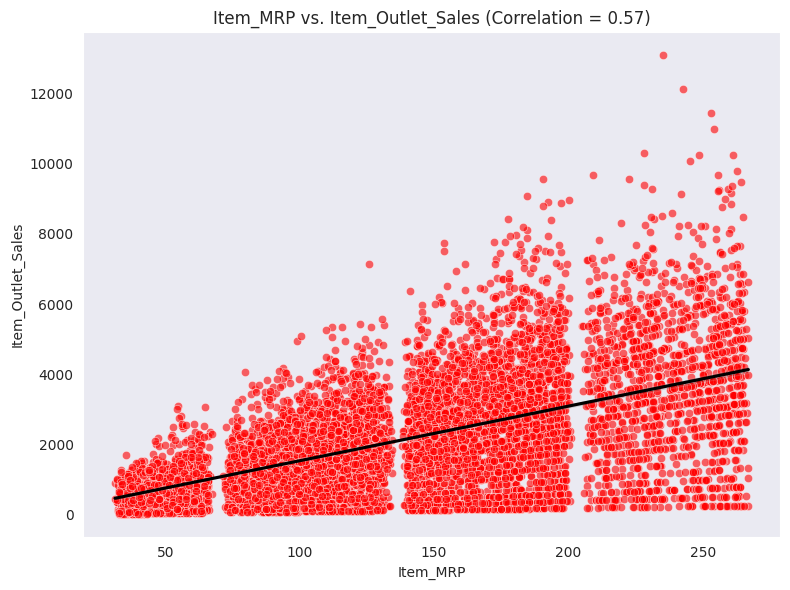

In [34]:
# Multivariate visualization (vs. Item_Outlet_Sales)
num_vs_target(df, x='Item_MRP')

- **Multivariate Analysis Questions:**
1. **Expected Predictor:** Yes, higher prices might lead to higher sales.
2. **Appears to be a Predictor:** Yes, there is a positive correlation.

### Feature: Outlet_Identifier
**Definition**: Store ID.

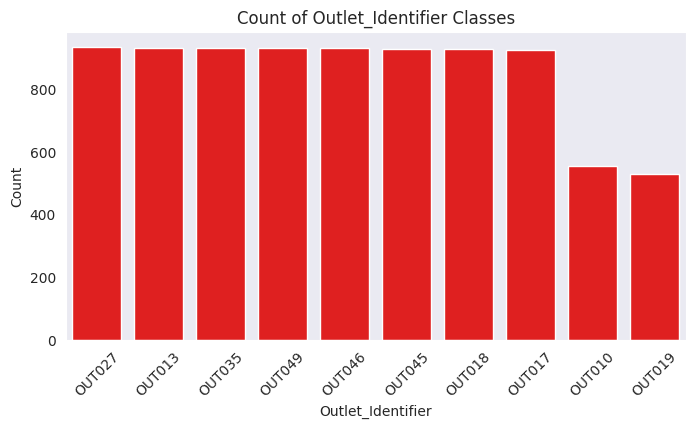

In [35]:
# Univariate visualization (categorical feature)
cat_feature(df, 'Outlet_Identifier')

- **Feature Inspection Questions:**
1. **Type of Feature:** Categorical (nominal).
2. **Null Values:** 0 null values.
3. **Constant or Quasi-Constant:** No.
4. **Cardinality:** Medium (10 unique values).
5. **Known Before Target:** Yes.
6. **Business Case for Exclusion:** Likely to exclude, as it is a unique identifier.

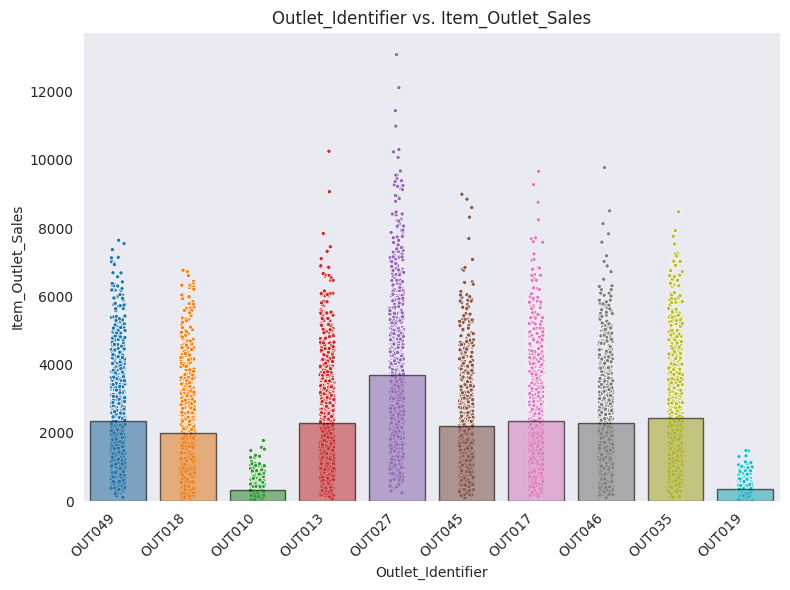

In [36]:
# Multivariate visualization (vs. Item_Outlet_Sales)
cat_vs_target(df, x='Outlet_Identifier')

- **Multivariate Analysis Questions:**
1. **Expected Predictor:** No, it is a unique identifier.
2. **Appears to be a Predictor:** Yes, there are noticeable differences.

### Feature: Outlet_Establishment_Year
**Definition**: The year in which the store was established.

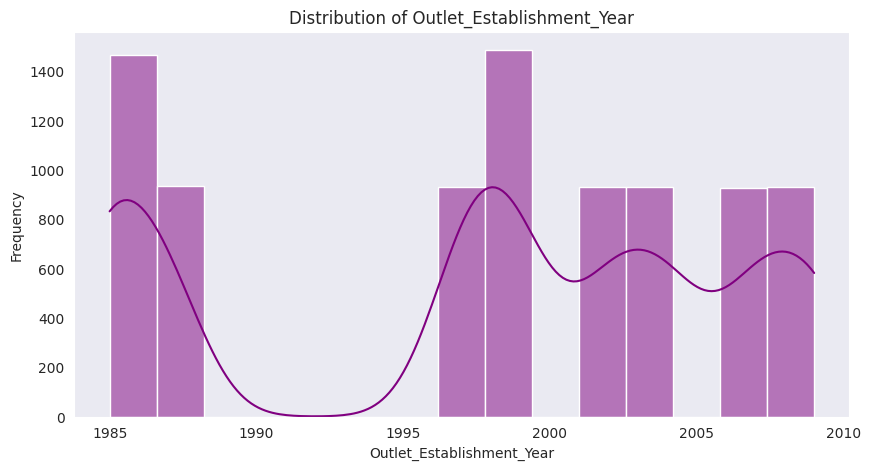

In [37]:
# Univariate visualization (numerical feature)
num_featur(df, 'Outlet_Establishment_Year')

- **Feature Inspection Questions:**
1. **Type of Feature:** Numeric (discrete).
2. **Null Values:** 0 null values.
3. **Constant or Quasi-Constant:** No.
4. **Cardinality:** Medium (9 unique values).
5. **Known Before Target:** Yes.
7. **Business Case for Exclusion:** No, older stores might have different sales.

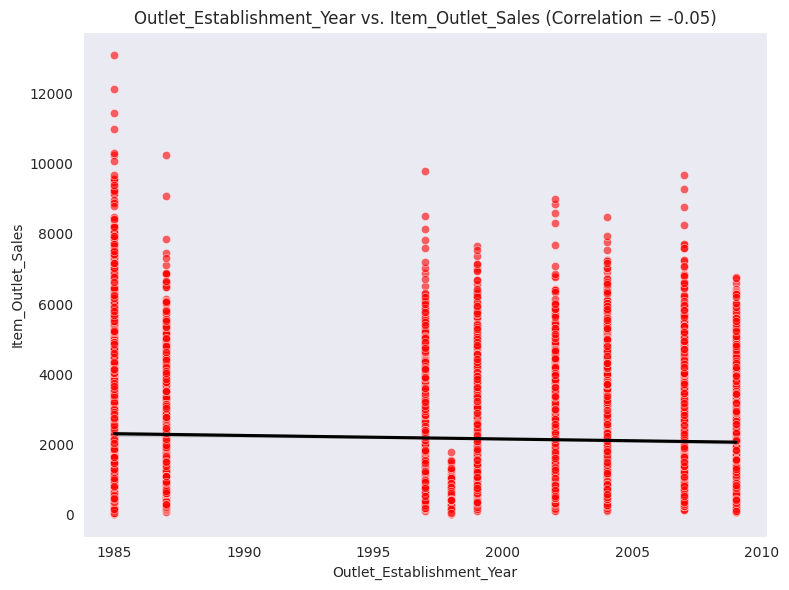

In [38]:
# Multivariate visualization (vs. Item_Outlet_Sales)
num_vs_target(df, x='Outlet_Establishment_Year')

- **Multivariate Analysis Questions:**
1. **Expected Predictor:** Yes, older stores might have higher sales.
2. **Appears to be a Predictor:** No, there is no even a slight trend.

### Feature: Outlet_Size
**Definition**: The size of the store in terms of ground area covered.

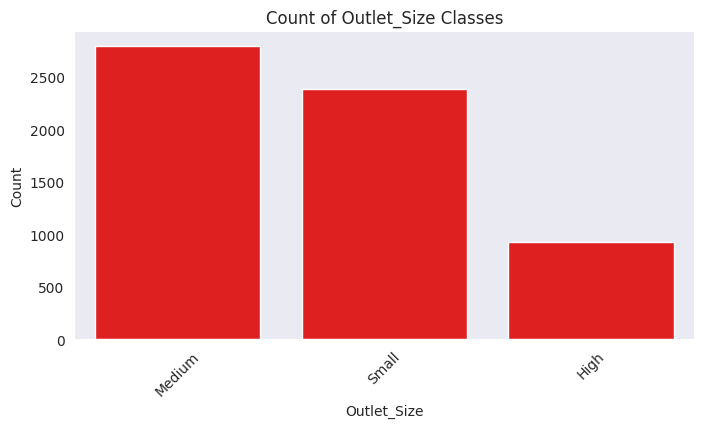

In [39]:
# Univariate visualization (categorical feature)
cat_feature(df, 'Outlet_Size')

- **Feature Inspection Questions:**
1. **Type of Feature:** Categorical (ordinal).
2. **Null Values:**
   - Number of Null Values: 2410 null values.
   - Percentage of null values: 28.3% (2410 / 8523)
   - **Action**: We droped the null values
3. **Constant or Quasi-Constant:** No.
4. **Cardinality:** Low (3 unique values).
5. **Known Before Target:** Yes.
6. **Business Case for Exclusion:** No, store size could influence sales.

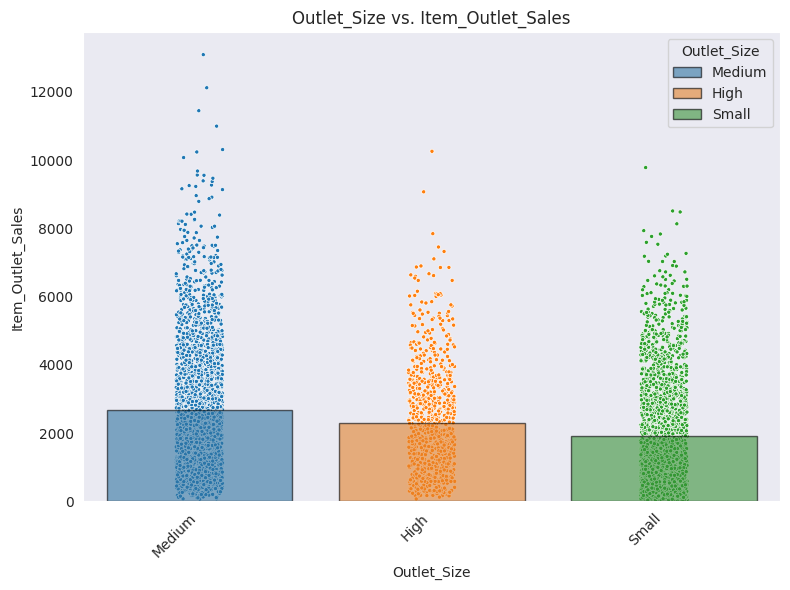

In [40]:
# Multivariate visualization (vs. Item_Outlet_Sales)
cat_vs_target(df, x='Outlet_Size')

- **Multivariate Analysis Questions:**
1. **Expected Predictor:** Yes, larger stores might have higher sales.
2. **Appears to be a Predictor:** Yes, there are noticeable differences.

### Feature: Outlet_Location_Type
**Definition**: The type of area in which the store is located.

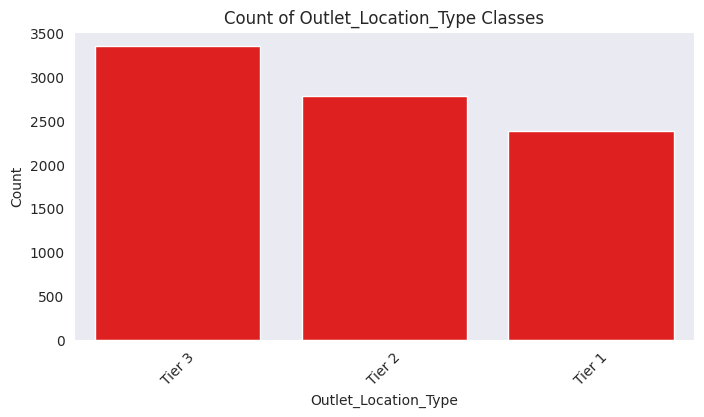

In [41]:
# Univariate visualization (categorical feature)
cat_feature(df, 'Outlet_Location_Type')

- **Feature Inspection Questions:**
1. **Type of Feature:** Categorical (ordinal).
2. **Null Values:** 0 null values.
3. **Constant or Quasi-Constant:** No.
4. **Cardinality:** Low (3 unique values).
5. **Known Before Target:** Yes.
6. **Business Case for Exclusion:** No, location type could influence sales.

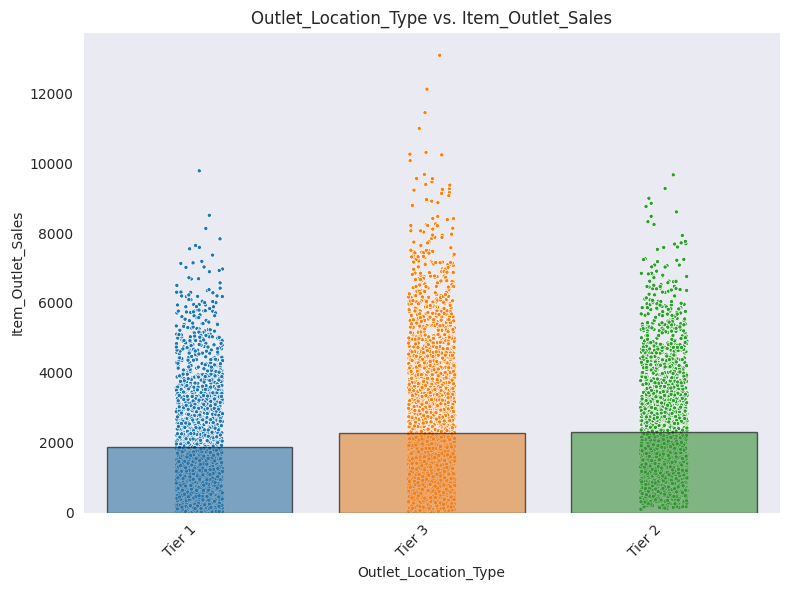

In [42]:
# Multivariate visualization (vs. Item_Outlet_Sales)
cat_vs_target(df, x='Outlet_Location_Type')

- **Multivariate Analysis Questions:**
1. **Expected Predictor:** Yes, stores in better locations might have higher sales.
2. **Appears to be a Predictor:** Yes, there are noticeable differences.

### Feature: Outlet_Type
**Definition**: Whether the outlet is a grocery store or some sort of supermarket.

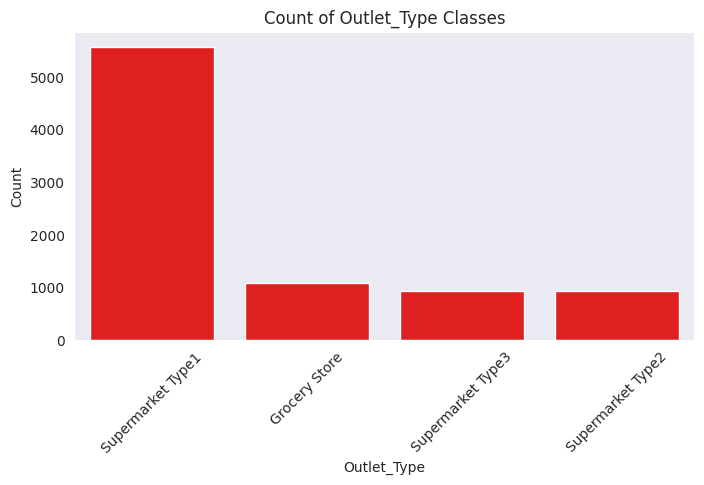

In [43]:
# Univariate visualization (categorical feature)
cat_feature(df, 'Outlet_Type')

- **Feature Inspection Questions:**
1. **Type of Feature:** Categorical (nominal).
2. **Null Values:** 0 null values.
3. **Constant or Quasi-Constant:** No.
4. **Cardinality:** Low (4 unique values).
5. **Known Before Target:** Yes.
6. **Business Case for Exclusion:** No, outlet type could influence sales.

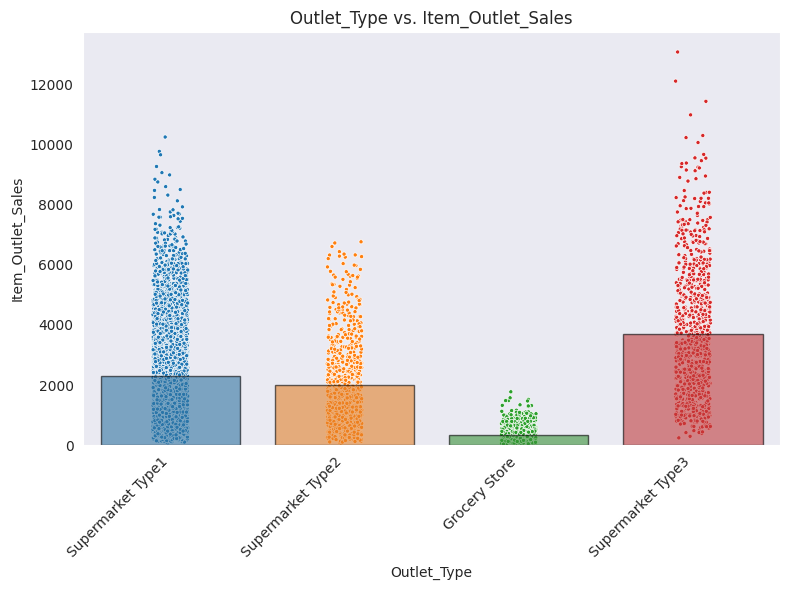

In [44]:
# Multivariate visualization (vs. Item_Outlet_Sales)
cat_vs_target(df, x='Outlet_Type')

- **Multivariate Analysis Questions:**
1. **Expected Predictor:** Yes, supermarket types might have higher sales.
2. **Appears to be a Predictor:** Yes, there are noticeable differences.

### Feature: Item_Outlet_Sales
**Definition**: Sales of the product in the particular store.

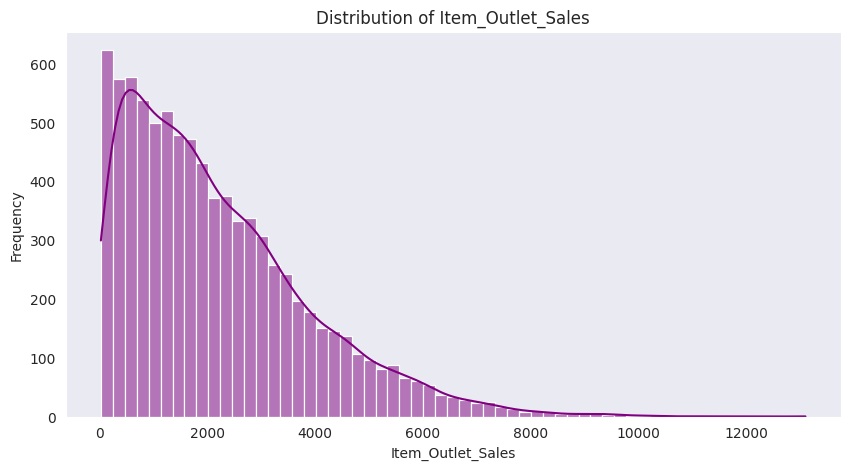

In [45]:
# Univariate visualization (numerical feature)
num_featur(df, 'Item_Outlet_Sales')

- **Feature Inspection Questions:**
1. **Type of Feature:** Numeric (continuous).
2. **Null Values:** 0 null values.
3. **Constant or Quasi-Constant:** No.
4. **Cardinality:** High (unique values > 10).
5. **Known Before Target:** No, this is the target variable.
6. **Business Case for Exclusion:** No, this is the target variable thar we're going to predict.

# Project 1 - Part 5
## Preprocesing for Machine Learning

In [46]:
pd.set_option('display.max_columns',100)
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

In [47]:
# Load the basic dataset
path2 = '/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df2 = pd.read_csv(path2)

In [48]:
# Overview
print(df2.info())
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [49]:
print(f"Total number of duplicates before removal: {df2.duplicated().sum()}")
df2 = df2.drop_duplicates()
print(f"Total number of duplicates after removal: {df2.duplicated().sum()}")

Total number of duplicates before removal: 0
Total number of duplicates after removal: 0


In [50]:
# Fixing inconsistency in Item_Fat_Content
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})
# Changes Confirmation
print(df2['Item_Type'].value_counts())

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64


In [51]:
# Drop High-Cardinality Identifier Columns.
df2 = df2.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)
# Changes Confirmation
df2.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [52]:
# The target we are trying to predict
y = df2['Item_Outlet_Sales']
# The features we will use to make the prediction
X =  df2.drop('Item_Outlet_Sales', axis=1)
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (6392, 9)
Test set shape: (2131, 9)


In [53]:
# PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scaler)
num_pipe

Numeric Columns: Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [54]:
# Making a numeric tuple for ColumnTransformer
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

In [55]:
# PREPROCESSING PIPELINE FOR ORDINAL DATA
# Save list of column names
ord_cols = ['Outlet_Size']
print("Ordinal Columns:", ord_cols)
# Create imputer for ordinal data
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')
## Making the OrdinalEncoder
# Specifying order of categories for our  Ordinal Qual/Cond Columms
qual_cond_order = ['NA','Small', 'Medium', 'High']
# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [qual_cond_order]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
## Making an ord_pipe
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
ord_pipe

Ordinal Columns: ['Outlet_Size']


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['NA', 'Small', 'Medium',
                                             'High']])),
                ('standardscaler', StandardScaler())])

In [56]:
# Making an ordinal_tuple for ColumnTransformer
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['NA', 'Small', 'Medium',
                                              'High']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size'])

In [57]:
# PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='most_frequent', fill_value='missing')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
ohe_pipe

OneHotEncoder Columns: Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object')


Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='missing', strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [58]:
# Making a ohe_tuple for ColumnTransformer
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='missing', strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object'))

In [59]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

In [60]:
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinale...
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [61]:
# Transform the training data
X_train_processed = col_transformer.transform(X_train)
# Transform the testing data
X_test_processed = col_transformer.transform(X_test)
# View the processed training data
X_train_processed.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,0.827485,-0.712775,1.828109,1.327849,0.748125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7510,0.566644,-1.291052,0.603369,1.327849,0.748125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5828,-0.121028,1.813319,0.244541,0.136187,0.748125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5327,-1.158464,-1.004931,-0.952591,0.732018,-0.264370,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4810,1.538870,-0.965484,-0.336460,0.493686,-1.276865,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Project 1 - Part 6
## Modeling & Evaluation

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = root_mean_squared_error(y_true, y_pred)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

In [64]:
# Build and evaluate Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_processed, y_train)

LinearRegression()

In [65]:
# Use custom function to predict and evaluate
evaluate_regression(lin_reg, X_train_processed, y_train, X_test_processed, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.162
- MSE = 1,298,027.006
- RMSE = 1,139.310
- R^2 = 0.561

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.841
- MSE = 1,195,846.760
- RMSE = 1,093.548
- R^2 = 0.567


- **Analysis:**
The linear regression model shows consistent performance between training (R²=0.561) and test (R²=0.567) sets, indicating it is neither significantly overfit nor underfit. The similar scores suggest the model generalizes well to unseen data.

In [66]:
from sklearn.ensemble import RandomForestRegressor
# Build and evaluate default Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [67]:
# Use custom function to predict and evaluate
evaluate_regression(rf, X_train_processed, y_train, X_test_processed, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 297.189
- MSE = 184,006.060
- RMSE = 428.959
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 771.873
- MSE = 1,240,416.523
- RMSE = 1,113.740
- R^2 = 0.550


- **Analysis:**
  - The Random Forest shows significant overfitting with a training R² of 0.938 vs test R² of 0.550.
  - Compared to Linear Regression (test R²=0.567), the Random Forest performs slightly worse on test data despite perfect training scores.
  - The large gap between training and test performance indicates the default parameters are too complex.

In [68]:
from sklearn.model_selection import GridSearchCV
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [69]:
# GridSearchCV
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    verbose=1,
    scoring='r2',
    n_jobs=-1
)
grid_search.fit(X_train_processed, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=1)

In [70]:
best_rf = grid_search.best_estimator_
evaluate_regression(best_rf, X_train_processed, y_train, X_test_processed, y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 662.312
- MSE = 882,113.428
- RMSE = 939.209
- R^2 = 0.702

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 740.180
- MSE = 1,135,406.891
- RMSE = 1,065.555
- R^2 = 0.588


- **Analysis:**
  - The tuned model shows improved generalization with test R² increasing from 0.550 to 0.588.
  - Reduced overfitting - the gap between training (0.702) and test (0.588) R² is much smaller.
  - Outperforms both the default Random Forest and Linear Regression on test data.

###  Evaluation
- **Model Recommendation:**
The recommended model is the "Tuned Random Forest Regressor" due to:
1. Best Test Performance: Achieved highest R² (0.588) on test data among all models.
2. Good Generalization: Minimal gap between training and test performance indicates less overfitting.
3. Balanced Complexity: More sophisticated than linear regression while being more constrained than default random forest
4. Interpretability: While not as simple as linear regression, feature importance can still be extracted.

- **Stakeholder Interpretation:**
  - R-squared Explanation:
Our best model explains about 60% of the variation in product sales. This means we can account for most of what makes some products sell better than others based on the product characteristics and store features we have in our data. About 40% of sales variation comes from factors not captured in our current data.

  - Overfitting Assessment:
The model shows minimal overfitting with: Training (R² = 0.702) and Test (R² = 0.588). The small difference indicates the model generalizes well to new data while still capturing meaningful patterns.